tfidf

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Import finalized dataset as pandas data frame.
df_jobads = pd.read_csv('data_jobads_final.csv', index_col=None)

# Apply the final touch.
df_jobads['job_description'] = df_jobads['job_description'].str.replace('\n', ' ')
df_jobads = df_jobads.dropna()
df_jobads = df_jobads.reset_index(drop=True)

df_jobads.head(2)

,title,id,link,date,job_description,label
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse


In [3]:
# Check the 'label' column for unique values.
labels = df_jobads['label'].unique().tolist()

print(labels)

['registered_nurse', 'electrician', 'data_analyst']


In [4]:
# Create 'id2label', 'label2id' variables for mapping the labels.
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

print(id2label)
print(label2id)

{0: 'registered_nurse', 1: 'electrician', 2: 'data_analyst'}
{'registered_nurse': 0, 'electrician': 1, 'data_analyst': 2}


In [5]:
# Encode the 'label' column.
df_jobads['label_encoded'] = df_jobads.label.map(lambda x: label2id[x.strip()])

df_jobads.head(2)

,title,id,link,date,job_description,label,label_encoded
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0


In [6]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Re-joining tokens
    processed_text = ' '.join(processed_tokens)
    return processed_text

In [8]:
df_jobads['processed_job_description'] = df_jobads['job_description'].apply(preprocess_text)

df_jobads.head(2)

,title,id,link,date,job_description,label,label_encoded,processed_job_description
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


In [9]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_jobads['processed_job_description'], df_jobads['label_encoded'], test_size=0.3, random_state=630)
print('TOTAL shape:', df_jobads.shape)
print('TRAINING shape:', X_train.shape)
print('TEST shape:', X_test.shape)

TOTAL shape: (1166, 8)
TRAINING shape: (816,)
TEST shape: (350,)


In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [12]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

logistic regression

In [14]:
# Classifier - Using Logistic Regression
clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: LOGISTIC REGRESSION (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.90      0.95        49
           2       0.98      0.99      0.99       119

    accuracy                           0.98       350
   macro avg       0.99      0.96      0.97       350
weighted avg       0.98      0.98      0.98       350



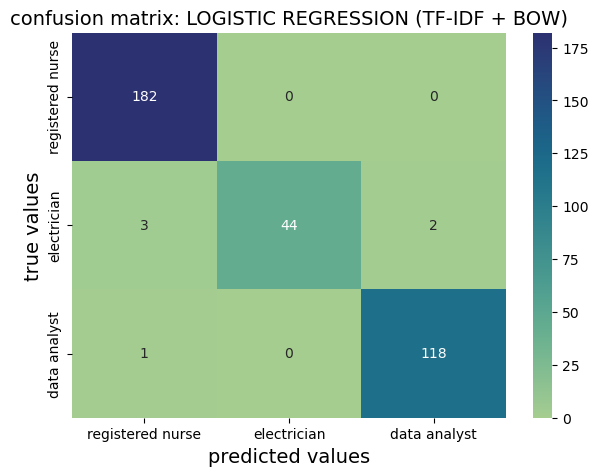

In [15]:
print('classification report: LOGISTIC REGRESSION (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: LOGISTIC REGRESSION (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

In [16]:
df_benchmark_train = pd.read_csv('ag_news_train.csv', index_col=None)
df_benchmark_test = pd.read_csv('ag_news_test.csv', index_col=None)

In [17]:
# Check the 'label' column for unique values.
labels = df_benchmark_train['label'].unique().tolist()

print(labels)

['business', 'sci/tech', 'sports', 'world']


In [18]:
# Create 'id2label', 'label2id' variables for mapping the labels.
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

print(id2label)
print(label2id)

{0: 'business', 1: 'sci/tech', 2: 'sports', 3: 'world'}
{'business': 0, 'sci/tech': 1, 'sports': 2, 'world': 3}


In [19]:
# Encode the 'label' column.
df_benchmark_train['label_encoded'] = df_benchmark_train.label.map(lambda x: label2id[x.strip()])
df_benchmark_test['label_encoded'] = df_benchmark_test.label.map(lambda x: label2id[x.strip()])

df_benchmark_test.head(2)

,text,label,label_encoded
0,Fears for T N pension after talks Unions repr...,business,0
1,The Race is On: Second Private Team Sets Laun...,sci/tech,1


In [20]:
df_benchmark_train['processed_text'] = df_benchmark_train['text'].apply(preprocess_text)
df_benchmark_test['processed_text'] = df_benchmark_test['text'].apply(preprocess_text)

df_benchmark_test.head(2)

,text,label,label_encoded,processed_text
0,Fears for T N pension after talks Unions repr...,business,0,fear n pension talk union representing worker ...
1,The Race is On: Second Private Team Sets Laun...,sci/tech,1,race second private team set launch date human...


In [21]:
X_train = df_benchmark_train['processed_text'].copy()
X_test = df_benchmark_test['processed_text'].copy()
y_train = df_benchmark_train['label_encoded'].copy()
y_test = df_benchmark_test['label_encoded'].copy()
print('TRAINING shape:', X_train.shape)
print('TEST shape:', X_test.shape)

TRAINING shape: (120000,)
TEST shape: (7600,)


In [22]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [24]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

In [25]:
# Classifier - Using Logistic Regression
clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: LOGISTIC REGRESSION (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1900
           1       0.88      0.89      0.88      1900
           2       0.96      0.97      0.96      1900
           3       0.92      0.91      0.91      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



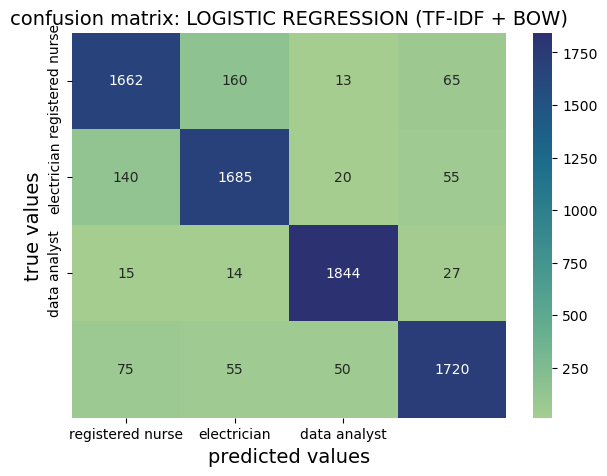

In [26]:
print('classification report: LOGISTIC REGRESSION (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: LOGISTIC REGRESSION (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()